In [23]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [24]:
# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)

In [25]:
# Find and open workbook by URL (returns a sheet object)
sheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1wdpG5Nu5f4mZTKN7H_DgqRXoIsYpef5ZwYeLl-OTYOE/edit#gid=1773034183')

In [26]:
# Get worksheet and records within e.g. all records in worksheet number 1, 2
raw = sheet.get_worksheet(0).get_all_records()

In [27]:
df = pd.DataFrame(raw)

In [30]:
df.head(3)

,Client Type,Name,Status,Total Entity Views,Total IP Profile Views,Total Insight Views,Total Unique Entity Views,Total Unique IP Profile Views,Total Unique Insight Views
0,internal,Adinda Praditya,Live,160,18,210,81,11,142
1,internal,Raghav Kapoor,Live,13146,1753,18976,1898,273,6642
2,internal,Lee Mitchell,Live,2337,643,17233,805,137,6749


In [29]:
external = df[ (df['Client Type']!='internal') & (df['Status']!='Suspended') ]

In [45]:
external.head(3)

,Client Type,Name,Status,Total Entity Views,Total IP Profile Views,Total Insight Views,Total Unique Entity Views,Total Unique IP Profile Views,Total Unique Insight Views
12,investor,Tan Chin-Hwee,Live,15,13,327,12,11,232
18,professional,Phil King,Live,5,0,28,4,0,21
21,professional,Kim Yu Ang,Live,0,2,41,0,1,37


In [46]:
external.columns

Index(['Client Type', 'Name', 'Status', 'Total Entity Views',
       'Total IP Profile Views', 'Total Insight Views',
       'Total Unique Entity Views', 'Total Unique IP Profile Views',
       'Total Unique Insight Views'],
      dtype='object')

In [35]:
external.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 12 to 1549
Data columns (total 9 columns):
Client Type                      602 non-null object
Name                             602 non-null object
Status                           602 non-null object
Total Entity Views               602 non-null int64
Total IP Profile Views           602 non-null int64
Total Insight Views              602 non-null int64
Total Unique Entity Views        602 non-null int64
Total Unique IP Profile Views    602 non-null int64
Total Unique Insight Views       602 non-null int64
dtypes: int64(6), object(3)
memory usage: 47.0+ KB


In [36]:
external.describe()

,Total Entity Views,Total IP Profile Views,Total Insight Views,Total Unique Entity Views,Total Unique IP Profile Views,Total Unique Insight Views
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,24.709302,9.923588,144.581395,11.599668,4.235880,93.822259
std,55.321299,21.636172,324.794230,22.826573,7.446147,197.273141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000
50%,4.000000,2.000000,28.000000,2.000000,1.000000,21.000000
75%,22.000000,9.750000,137.500000,13.000000,5.000000,96.750000
max,456.000000,263.000000,4519.000000,189.000000,57.000000,2553.000000


In [44]:
# On average, each client views about 94 unique insights
external['Total Unique Insight Views'].sum() / external['Name'].nunique()

93.9783693843594

In [47]:
# 11 unique entities 
external['Total Unique Entity Views'].sum() / external['Name'].nunique()

11.618968386023294

In [48]:
# 4 unique IP profiles 
external['Total Unique IP Profile Views'].sum() / external['Name'].nunique()

4.242928452579035

In [54]:
external.head(3)

,Client Type,Name,Status,Total Entity Views,Total IP Profile Views,Total Insight Views,Total Unique Entity Views,Total Unique IP Profile Views,Total Unique Insight Views
12,investor,Tan Chin-Hwee,Live,15,13,327,12,11,232
18,professional,Phil King,Live,5,0,28,4,0,21
21,professional,Kim Yu Ang,Live,0,2,41,0,1,37


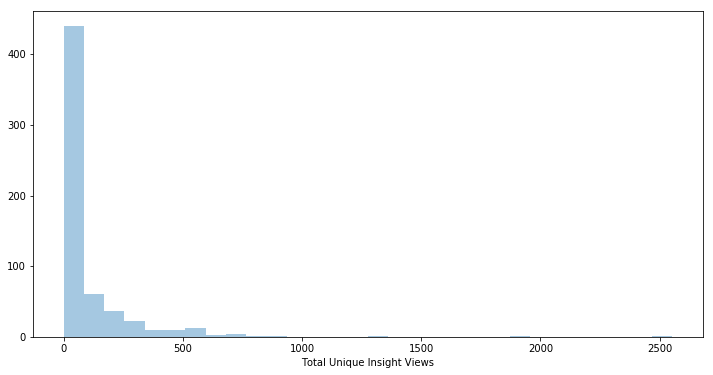

In [59]:
plt.figure(figsize=(12,6))
sns.distplot(external['Total Unique Insight Views'],kde=False,bins=30)

In [60]:
external['Total Unique Insight Views'].describe()

count     602.000000
mean       93.822259
std       197.273141
min         0.000000
25%         2.000000
50%        21.000000
75%        96.750000
max      2553.000000
Name: Total Unique Insight Views, dtype: float64

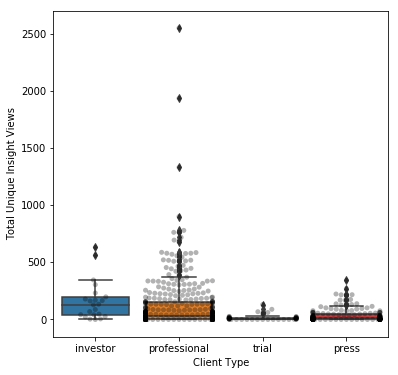

In [64]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Client Type',y='Total Unique Insight Views',data=external)
sns.swarmplot(x='Client Type',y='Total Unique Insight Views',data=external,color='black', alpha=0.3)

In [65]:
external[external['Client Type'] == 'professional']['Total Unique Insight Views'].describe()

count     370.000000
mean      125.340541
std       238.032650
min         0.000000
25%         4.000000
50%        34.000000
75%       154.750000
max      2553.000000
Name: Total Unique Insight Views, dtype: float64

In [67]:
ex_5 = external[external['Total Unique Insight Views']<=500]

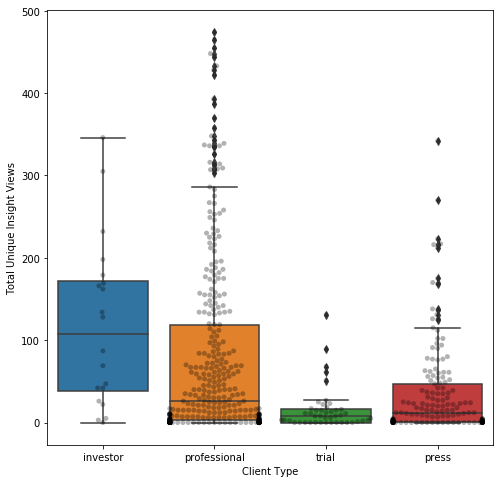

In [68]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Client Type',y='Total Unique Insight Views',data=ex_5)
sns.swarmplot(x='Client Type',y='Total Unique Insight Views',data=ex_5,color='black', alpha=0.3)

In [71]:
ex_5[ex_5['Client Type']=='professional'].describe()

,Total Entity Views,Total IP Profile Views,Total Insight Views,Total Unique Entity Views,Total Unique IP Profile Views,Total Unique Insight Views
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,23.560694,9.184971,121.473988,10.953757,3.829480,79.699422
std,43.837223,21.359732,177.916185,17.535493,6.692617,110.456848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000
50%,4.000000,2.000000,33.500000,3.000000,1.000000,26.000000
75%,25.000000,9.000000,176.500000,14.000000,5.000000,119.000000
max,347.000000,263.000000,942.000000,113.000000,57.000000,474.000000
